In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

In [ ]:
# create the dataframe from a csv file
data = pd.read_csv('data/mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Removed columns with one unique value
data = data.drop(columns=data.nunique()[data.nunique() == 1].index)

In [ ]:
# Check for missing data
missing_values = [np.nan, "", " ", None]

data.isin(missing_values).mean().sort_values(ascending=False) * 100

class                       0.0
cap-shape                   0.0
population                  0.0
spore-print-color           0.0
ring-type                   0.0
ring-number                 0.0
veil-color                  0.0
stalk-color-below-ring      0.0
stalk-color-above-ring      0.0
stalk-surface-below-ring    0.0
stalk-surface-above-ring    0.0
stalk-root                  0.0
stalk-shape                 0.0
gill-color                  0.0
gill-size                   0.0
gill-spacing                0.0
gill-attachment             0.0
odor                        0.0
bruises                     0.0
cap-color                   0.0
cap-surface                 0.0
habitat                     0.0
dtype: float64

In [ ]:
# Select Target Column
# In this example we will predict on "class"
X = data.drop(columns="class")
y = data["class"]

In [ ]:
# Encode variables
# drop the first column to avoid the dummy variable trap
X = pd.get_dummies(X, drop_first=True)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Split the data into Train - Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
### Model Algorithm Selection ###
## 1. Logistic Regression ##
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression().fit(X_train, y_train)
log_predictions = log_reg.predict(X_test)
accuracy_score(log_predictions, y_test)

1.0

In [ ]:
## 2. Random Forest Classifier ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_class = RandomForestClassifier()
random_forest_class.fit(X_train, y_train)
rf_predictions = log_reg.predict(X_test)
accuracy_score(rf_predictions, y_test)

1.0

In [ ]:
## 3. Boosting - LightGBM (Gradient Boosting Model) ##
! pip install lightgbm

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
light_gbm_predictions = clf.predict(X_test)
accuracy_score(light_gbm_predictions, y_test)


     |████████████████████████████████| 2.0 MB 20.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


1.0

<AxesSubplot:>

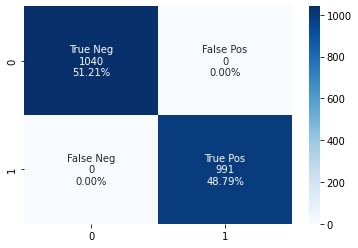

In [ ]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_matrix_plotter(predictions, actuals):
    cf_matrix = confusion_matrix(rf_predictions, y_test)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

confusion_matrix_plotter(light_gbm_predictions, y_test)

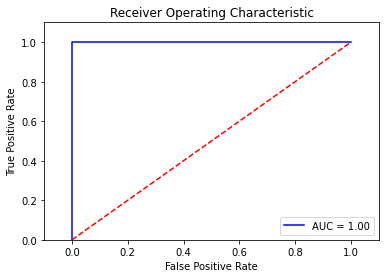

In [ ]:
# Area Under the Curve (AUC)
# True Postive Rate (Sensitivity)
# True Negativie Rate (Specificity)
# Fale Positive Rate

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = random_forest_class.predict_proba(X_test)
preds = probs[:,1]
y_test = y_test.map({'e':1, 'p':0})
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(tpr, fpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Determine F1 Score
from sklearn.metrics import f1_score

f1_score(y_true = y_test, y_pred = y_test)

1.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc843f04-8de7-4926-8946-57fb094cb8ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>